In [1]:
import numpy as np
import pandas as pd
import datetime
from matplotlib import pyplot as plt

import sys
import os
import glob

# Lavori preeliminari

In [315]:
experiment_subset = "freq"

In [316]:
experiments = os.listdir(experiment_subset)

In [317]:
experiments

['5_1000_1000_1_0_0_0_20210910_1515',
 '5_100_9000_1_0_0_0_20210910_1539',
 '5_10_90000_1_0_0_0_20210910_1600',
 '5_6_180000_1_0_0_0_20210910_1641',
 '5_8_112500_1_0_0_0_20210910_1620']

In [216]:
os.listdir(experiment_subset+"/"+experiments[0]+"/devices")

['.ipynb_checkpoints',
 'term1000.csv',
 'term1001.csv',
 'term1002.csv',
 'term1003.csv',
 'term1004.csv']

In [221]:
devices = pd.DataFrame(columns=[0,1,2])
for device_file in os.listdir(experiment_subset+"/"+experiments[0]+"/devices"):
    print(device_file)
    if(device_file.endswith(".csv")):
        device = pd.read_csv(experiment_subset+"/"+experiments[0]+"/devices/"+device_file, header=None)
        devices = pd.concat([devices, device])

.ipynb_checkpoints
term1000.csv
term1001.csv
term1002.csv
term1003.csv
term1004.csv


Lettura e pulizia dei dati letti dal consumer.

Vengono rimossi i dati riguardati device non ancora accesi

In [222]:
consumer = pd.read_csv(experiment_subset+"/"+experiments[0]+"/consumer/"+experiments[0]+".csv", header=None, sep=", ").replace("None", np.nan).dropna()

<ipython-input-222-4d80fab9f731>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  consumer = pd.read_csv(experiment_subset+"/"+experiments[0]+"/consumer/"+experiments[0]+".csv", header=None, sep=", ").replace("None", np.nan).dropna()


In [223]:
consumer

,0,1,2,3,4
15,urn:ngsi-ld:device:1000,True,1631287201035,1631287201013,1631287200976
16,urn:ngsi-ld:device:1001,True,1631287201036,1631287201029,1631287200996
17,urn:ngsi-ld:device:1002,True,1631287201048,1631287201040,1631287201012
18,urn:ngsi-ld:device:1003,True,1631287201060,1631287201051,1631287201030
19,urn:ngsi-ld:device:1004,True,1631287201093,1631287201083,1631287201049
...,...,...,...,...,...
5005,urn:ngsi-ld:device:1002,True,1631288200411,1631288200401,1631288200350
5006,urn:ngsi-ld:device:1004,True,1631288200411,1631288200401,1631288200350
5007,urn:ngsi-ld:device:1001,True,1631288200411,1631288200401,1631288200350
5008,urn:ngsi-ld:device:1000,True,1631288200411,1631288200402,1631288200350


In [224]:
consumer_raw = pd.read_csv(experiment_subset+"/"+experiments[0]+"/consumer/"+experiments[0]+".csv", header=None, sep=", ")

<ipython-input-224-3c64bda37730>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  consumer_raw = pd.read_csv(experiment_subset+"/"+experiments[0]+"/consumer/"+experiments[0]+".csv", header=None, sep=", ")


In [225]:
consumer_raw.head(20)

,0,1,2,3,4
0,urn:ngsi-ld:device:1002,None,1631287180010,1631287179587,None
1,urn:ngsi-ld:device:1001,None,1631287180027,1631287179599,None
2,urn:ngsi-ld:device:1000,None,1631287180038,1631287179601,None
3,urn:ngsi-ld:device:1003,None,1631287180039,1631287179929,None
4,urn:ngsi-ld:device:1004,None,1631287180455,1631287180435,None
5,urn:ngsi-ld:device:1000,True,1631287182213,1631287182177,None
6,urn:ngsi-ld:device:1001,True,1631287182729,1631287182707,None
7,urn:ngsi-ld:device:1002,True,1631287183427,1631287183414,None
8,urn:ngsi-ld:device:1003,True,1631287184144,1631287184131,None
9,urn:ngsi-ld:device:1004,True,1631287184177,1631287184163,None


Non mi torna, quando il device è on dovrebbe mandare anche il suo tempo invece, incrociando i dati con quelli scritti dal device, mia accorgo che ci sono nei primi dati raccolti delle perdite di informazioni

# Test automazione

In [313]:
def readAggregateDevices(experiment_set, experiment_name):
    experiments = os.listdir(experiment_set)
    devices = pd.DataFrame(columns=[0,1,2])
    for device_file in os.listdir(experiment_set+"/"+experiment_name+"/devices"):
        if(device_file.endswith(".csv")):
            device = pd.read_csv(experiment_set+"/"+experiment_name+"/devices/"+device_file, header=None)
            devices = pd.concat([devices, device])
    devices.columns=["Device ID", "Device Status", "Device Timestamp"]
    devices["datetime"] = pd.to_datetime(devices["Device Timestamp"], unit="ms")

    return devices

In [314]:
def readConsumer(experiment_set, experiment_name):
    result = pd.read_csv(experiment_subset+"/"+experiment_name+"/consumer/"+experiment_name+".csv", header=None, sep=", ") \
        .replace("None", np.nan) \
        .dropna()
    result.columns=["Device ID", "Device Status", "Kafka Timestamp", "Draco Timestamp", "Device Timestamp"]
    
    result["datetime"] = pd.to_datetime(result["Device Timestamp"], unit="ms")
    result["Kafka Timestamp"] = result["Kafka Timestamp"].astype("int64", copy=False)
    result["Draco Timestamp"] = result["Draco Timestamp"].astype("int64", copy=False)
    result["Device Timestamp"] = result["Device Timestamp"].astype("int64", copy=False)
    
    result["Delay Draco/Device"] = result["Draco Timestamp"] - result["Device Timestamp"]
    result["Delay Kafka/Draco"] = result["Kafka Timestamp"] - result["Draco Timestamp"]
    result["Delay Kafka/Device"] = result["Kafka Timestamp"] - result["Device Timestamp"]

    return result

In [228]:
def createResultHolder(parameters):
    result = pd.DataFrame(columns= [*parameters, "Fiware message count", "Fiware delay", "Kafka message count", "Kafka delay"])
    return result

In [318]:
experiment_set = "freq"
experiment_name = "5_1000_1000_1_0_0_0_20210910_1515"

In [319]:
experiments = os.listdir(experiment_set)

In [321]:
devices = readAggregateDevices(experiment_set, experiment_name)

In [322]:
consumer = readConsumer(experiment_set, experiment_name)

<ipython-input-314-c9f73ba08a14>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  result = pd.read_csv(experiment_subset+"/"+experiment_name+"/consumer/"+experiment_name+".csv", header=None, sep=", ") \


## Result holder

In [234]:
result_holder = createResultHolder(["Frequency", "Device #", "Message #"])

In [235]:
result_holder

,Frequency,Device #,Message #,Fiware message count,Fiware delay,Kafka message count,Kafka delay


## Grafico 1

X = tempo

Y = count (device vs consumer)

In [404]:
def graphType1(devices, consumer, title):
    res = pd.DataFrame()
    res["device aggregregate count"] = devices.resample("1s", on="datetime").count()["datetime"]
    res["endpoint count"] = consumer.resample("1s", on="datetime").count()["datetime"]
    ax = res.plot()
    ax.set_xlabel("time")
    ax.set_ylabel("count")
    ax.set_title("title")
    ax.plot()

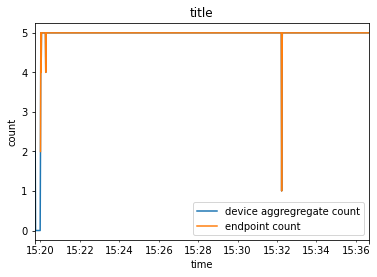

In [406]:
graphType1(devices, consumer, "test")

## Grafico 2

x = tempo

y = delay (device/draco, draco/kafka, device/kafka)

In [401]:
def graphType2(consumer, title):        

    delayDracoDevice = consumer.resample("1s", on='datetime').mean()["Delay Draco/Device"]
    delayKafkaDraco = consumer.resample("1s", on='datetime').mean()["Delay Kafka/Draco"]
    delayKafkaDevice = consumer.resample("1s", on='datetime').mean()["Delay Kafka/Device"]
    
    
    res = pd.DataFrame()
    res["Delay Draco/Device"] = delayDracoDevice
    res["Delay Kafka/Draco"] = delayKafkaDraco
    res["Delay Kafka/Device"] = delayKafkaDevice

    
    
    ax = res.plot()
    ax.set_xlabel("time")
    ax.set_ylabel("delay (ms)")
    ax.set_title(title)
    ax.plot()

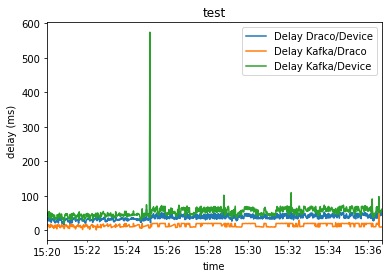

In [403]:
graphType2(consumer, "test")

# Grafico 3

riguarda un intero setting, non i singoli esperimenti come quelli di prima

In [399]:
def graphType3(experiment_set, variable_index, xlabel, title):
    metrics = {}
    experiments = os.listdir(experiment_subset)
    for experiment in experiments:
        consumer = readConsumer(experiment_set, experiment)
        devices = readAggregateDevices(experiment_set, experiment)
        label = experiment.split("_")[variable_index]
        metrics[label] = (consumer.shape[0] / devices.shape[0]) * 100
       
    result = pd.DataFrame.from_dict(metrics, orient="index")
    
    plt = result.plot(kind="bar", legend=False)
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel("#received / #sent")
    plt.plot()

<ipython-input-314-c9f73ba08a14>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  result = pd.read_csv(experiment_subset+"/"+experiment_name+"/consumer/"+experiment_name+".csv", header=None, sep=", ") \
<ipython-input-314-c9f73ba08a14>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  result = pd.read_csv(experiment_subset+"/"+experiment_name+"/consumer/"+experiment_name+".csv", header=None, sep=", ") \
<ipython-input-314-c9f73ba08a14>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interprete

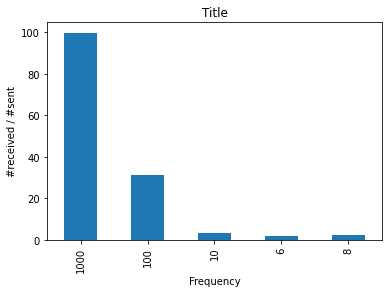

In [400]:
graphType3(experiment_set, 1, "Frequency", "Title")

# Grafico 4

X = variable che cambia nel setting
Y = ritardo medio end to end

In [417]:
def graphType4(experiment_set, variable_index, xlabel, title):
    metrics = {}
    experiments = os.listdir(experiment_subset)
    for experiment in experiments:
        label = experiment.split("_")[variable_index]
        consumer = readConsumer(experiment_set, experiment)
        metrics[label] = consumer["Delay Kafka/Device"].mean()

        
    
    result = pd.DataFrame.from_dict(metrics, orient="index")
    
    plt = result.plot(kind="bar", legend=False)
    plt.set_title(title)
    plt.set_xlabel(xlabel)
    plt.set_ylabel("delay(ms)")
    plt.plot()

<ipython-input-314-c9f73ba08a14>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  result = pd.read_csv(experiment_subset+"/"+experiment_name+"/consumer/"+experiment_name+".csv", header=None, sep=", ") \
<ipython-input-314-c9f73ba08a14>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  result = pd.read_csv(experiment_subset+"/"+experiment_name+"/consumer/"+experiment_name+".csv", header=None, sep=", ") \
<ipython-input-314-c9f73ba08a14>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interprete

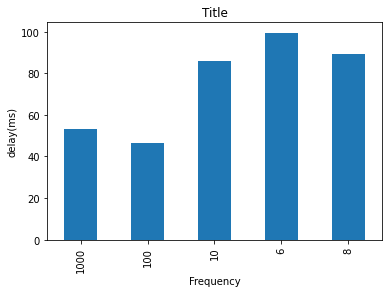

In [418]:
graphType4(experiment_set, 1, "Frequency", "Title")